In [5]:
import json, gzip
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
i = 0
file = "All_Beauty.jsonl.gz"
reviews = []
with gzip.open(file, "rt", encoding="utf-8") as fp:
    for i, line in enumerate(fp):
        reviews.append(json.loads(line))
df = pd.DataFrame(reviews)
df.head()
print(f"Loaded {len(df):,} reviews")
print(f"\nColumns: {list(df.columns)}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nRating distribution:")
print(df['rating'].value_counts().sort_index())

Loaded 701,528 reviews

Columns: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase']

Data types:
rating               float64
title                 object
text                  object
images                object
asin                  object
parent_asin           object
user_id               object
timestamp              int64
helpful_vote           int64
verified_purchase       bool
dtype: object

Missing values:
rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64

Rating distribution:
rating
1.0    102080
2.0     43034
3.0     56307
4.0     79381
5.0    420726
Name: count, dtype: int64


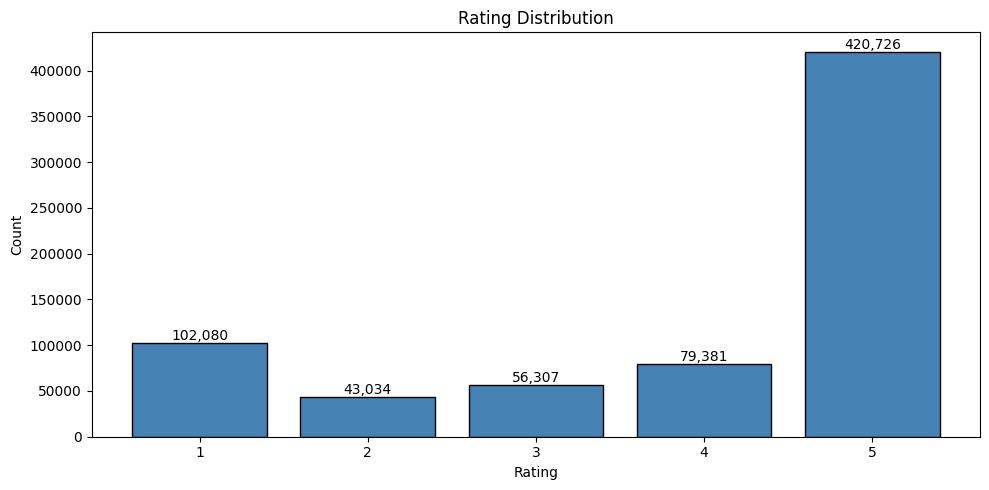

First 100k reviews:
rating
1.0    0.11042
2.0    0.06135
3.0    0.09093
4.0    0.13156
5.0    0.60574
Name: proportion, dtype: float64

Last 100k reviews:
rating
1.0    0.19621
2.0    0.05955
3.0    0.06641
4.0    0.09757
5.0    0.58026
Name: proportion, dtype: float64


In [12]:
plt.figure(figsize=(10, 5))
rating_counts = df['rating'].value_counts().sort_index()
plt.bar(rating_counts.index, rating_counts.values, color='steelblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
for i, v in zip(rating_counts.index, rating_counts.values):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom')
plt.tight_layout()
plt.show()


print("First 100k reviews:")
df_early = pd.DataFrame(reviews[:100000])
print(df_early['rating'].value_counts(normalize=True).sort_index())

print("\nLast 100k reviews:")
df_late = pd.DataFrame(reviews[-100000:])
print(df_late['rating'].value_counts(normalize=True).sort_index())


Review length stats (words):
count    701528.000000
mean         32.750720
std          45.973273
min           0.000000
25%           8.000000
50%          19.000000
75%          40.000000
max        2585.000000
Name: text_length, dtype: float64


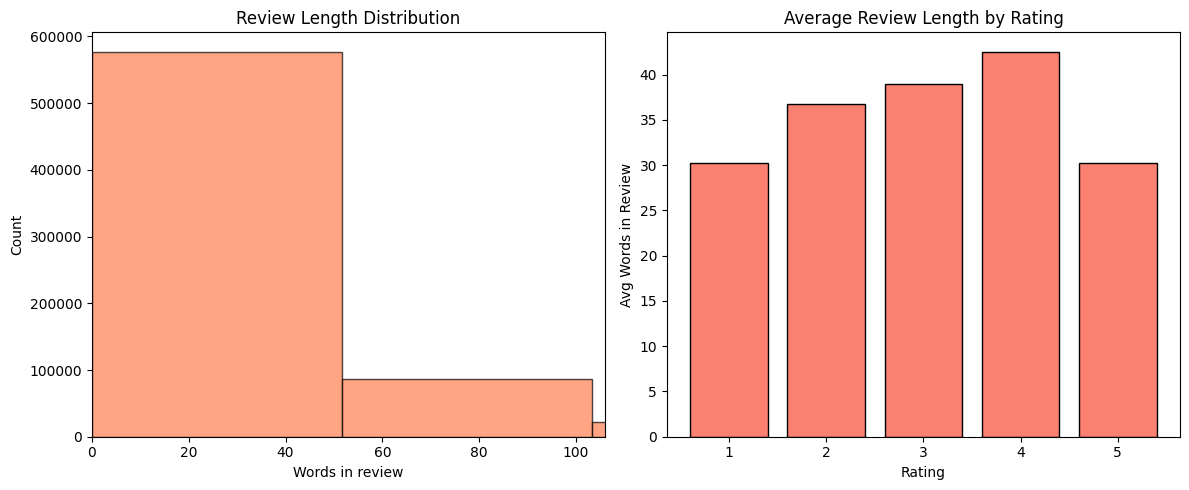


631,986 unique users
115,709 unique products
Avg reviews per user: 1.11
Avg reviews per product: 6.06

Users with only 1 review: 583,553 (92.3%)
Products with only 1 review: 48,859 (42.2%)

Top 10 most reviewed products:
asin
B007IAE5WY    1962
B00EEN2HCS    1750
B07C533XCW    1513
B00R1TAN7I    1372
B08L5KN7X4    1343
B019GBG0IE    1328
B0719KWG8H    1168
B0092MCQZ4    1128
B0107QYW14    1112
B0070Z7KME     934
Name: count, dtype: int64

Reviews by year:
year
2000         1
2001        12
2002        24
2003        56
2004       134
2005       267
2006       419
2007      1162
2008      1269
2009      1207
2010      1586
2011      1877
2012      2803
2013      7948
2014     16279
2015     36239
2016     62747
2017     68035
2018     72707
2019     99120
2020    126753
2021    124897
2022     61581
2023     14405
Name: count, dtype: int64


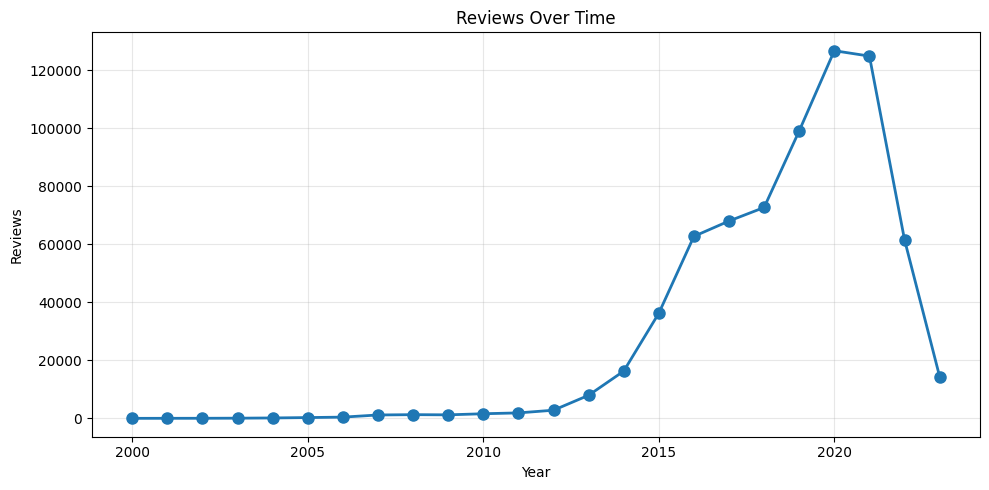


Helpful votes by rating:
rating
1.0    0.96
2.0    0.75
3.0    0.73
4.0    0.93
5.0    0.96
Name: helpful_vote, dtype: float64


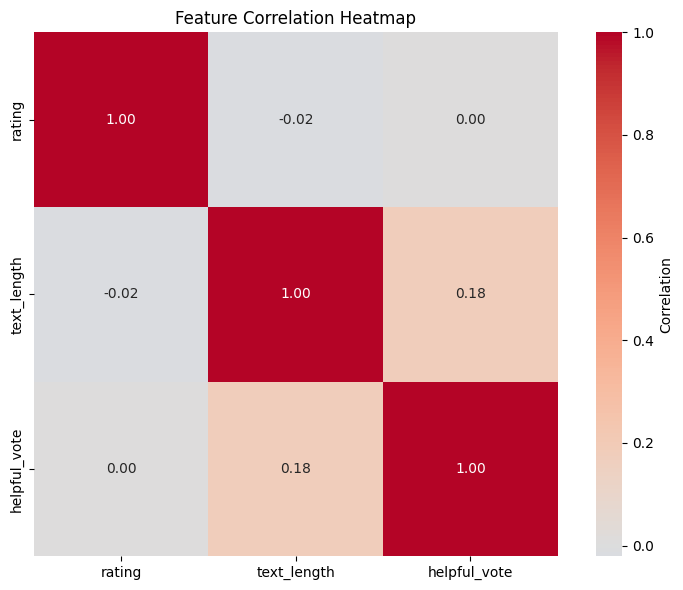

In [13]:
# Review text analysis
df['text_length'] = df['text'].apply(lambda x: len(x.split()) if pd.notna(x) else 0)
print(f"\nReview length stats (words):\n{df['text_length'].describe()}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['text_length'], bins=50, color='coral', edgecolor='black', alpha=0.7)
plt.xlabel('Words in review')
plt.ylabel('Count')
plt.title('Review Length Distribution')
plt.xlim(0, df['text_length'].quantile(0.95))

plt.subplot(1, 2, 2)
avg_length_by_rating = df.groupby('rating')['text_length'].mean()
plt.bar(avg_length_by_rating.index, avg_length_by_rating.values, color='salmon', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Avg Words in Review')
plt.title('Average Review Length by Rating')

plt.tight_layout()
plt.show()

# User and product statistics
n_users = df['user_id'].nunique()
n_products = df['asin'].nunique()

print(f"\n{n_users:,} unique users")
print(f"{n_products:,} unique products")
print(f"Avg reviews per user: {len(df)/n_users:.2f}")
print(f"Avg reviews per product: {len(df)/n_products:.2f}")

# Sparsity analysis
user_counts = df['user_id'].value_counts()
product_counts = df['asin'].value_counts()

print(f"\nUsers with only 1 review: {(user_counts == 1).sum():,} ({(user_counts == 1).sum()/n_users*100:.1f}%)")
print(f"Products with only 1 review: {(product_counts == 1).sum():,} ({(product_counts == 1).sum()/n_products*100:.1f}%)")

print(f"\nTop 10 most reviewed products:")
print(product_counts.head(10))

# Temporal trends
if 'timestamp' in df.columns:
    df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
    df['year'] = df['date'].dt.year
    
    yearly = df['year'].value_counts().sort_index()
    print(f"\nReviews by year:")
    print(yearly)
    
    plt.figure(figsize=(10, 5))
    plt.plot(yearly.index, yearly.values, marker='o', linewidth=2, markersize=8)
    plt.xlabel('Year')
    plt.ylabel('Reviews')
    plt.title('Reviews Over Time')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Helpfulness
if 'helpful_vote' in df.columns:
    print(f"\nHelpful votes by rating:")
    print(df.groupby('rating')['helpful_vote'].mean().round(2))

# Correlation heatmap
numeric_cols = ['rating', 'text_length']
if 'helpful_vote' in df.columns:
    numeric_cols.append('helpful_vote')

corr = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True, cbar_kws={'label': 'Correlation'})
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [11]:
import json
import gzip
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from collections import Counter
min_reviews_per_user = 2
user_counts = df['user_id'].value_counts()
valid_users = user_counts[user_counts >= min_reviews_per_user].index
df_filtered = df[df['user_id'].isin(valid_users)]
df_filtered = df_filtered.head(150000)
print(f"Filtered dataset: {len(df_filtered)} reviews, {len(valid_users)} users")
for col in ['text', 'title', 'parent_asin']:
    if col not in df_filtered.columns:
        df_filtered[col] = ''
    df_filtered[col] = df_filtered[col].fillna('')
df_filtered['combined_text'] = df_filtered['text'] + ' ' + df_filtered['title'] + ' ' + df_filtered['parent_asin']

# -------------------------------
# Split train/test
# -------------------------------
train_df, test_df = train_test_split(df_filtered, test_size=0.2, random_state=42)
print(f"Train: {len(train_df)}, Test: {len(test_df)}")

# -------------------------------
# Build item TF-IDF matrix
# -------------------------------
item_texts = train_df.groupby('asin')['combined_text'].apply(lambda x: " ".join(x))
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(item_texts)
asins = list(item_texts.index)
asin_to_index = {asin: idx for idx, asin in enumerate(asins)}

# -------------------------------
# Popularity baseline
# -------------------------------
popular_items = train_df['asin'].value_counts().index.tolist()
def recommend_popular(top_k=10):
    return popular_items[:top_k]

# -------------------------------
# TF-IDF recommendation
# -------------------------------
def recommend_for_user(user_id, top_k=10):
    user_items = train_df[train_df['user_id'] == user_id]['asin'].unique()
    if len(user_items) == 0:
        return []

    sim_scores = np.zeros(len(asins))
    for asin in user_items:
        if asin in asin_to_index:
            vec = tfidf_matrix[asin_to_index[asin]]
            sims = cosine_similarity(vec, tfidf_matrix).flatten()
            sim_scores += sims

    # Remove already seen items
    seen_idx = [asin_to_index[asin] for asin in user_items if asin in asin_to_index]
    sim_scores[seen_idx] = 0

    top_idx = np.argsort(sim_scores)[::-1][:top_k]
    return [asins[i] for i in top_idx]

# -------------------------------
# Precision@10 evaluation
# -------------------------------
def precision_at_k(user_id, top_k=10):
    true_items = test_df[test_df['user_id'] == user_id]['asin'].unique()
    if len(true_items) == 0:
        return None
    recommended = recommend_for_user(user_id, top_k)
    hits = len(set(recommended) & set(true_items))
    return hits / top_k

def precision_at_k_baseline(user_id, top_k=10):
    true_items = test_df[test_df['user_id'] == user_id]['asin'].unique()
    if len(true_items) == 0:
        return None
    recommended = recommend_popular(top_k)
    hits = len(set(recommended) & set(true_items))
    return hits / top_k

# -------------------------------
# Compute average Precision@10
# -------------------------------
test_users = test_df['user_id'].unique()
tfidf_precisions = []
baseline_precisions = []

for i, user in enumerate(test_users):
    if i % 100 == 0:
        print(f"Evaluating user {i}/{len(test_users)}")
    p = precision_at_k(user, top_k=10)
    if p is not None:
        tfidf_precisions.append(p)
    b = precision_at_k_baseline(user, top_k=10)
    if b is not None:
        baseline_precisions.append(b)

print("Average Precision@10 (TF-IDF):", np.mean(tfidf_precisions))
print("Average Precision@10 (Popularity Baseline):", np.mean(baseline_precisions))

# -------------------------------
# Example top-10 recommendation
# -------------------------------
example_user = test_users[0]
print(f"Top 10 TF-IDF recommendations for user {example_user}: {recommend_for_user(example_user, 10)}")
print(f"Top 10 Popular items (baseline): {recommend_popular(10)}")

Filtered dataset: 117975 reviews, 48433 users
Train: 94380, Test: 23595
Evaluating user 0/19276
Evaluating user 100/19276
Evaluating user 200/19276
Evaluating user 300/19276
Evaluating user 400/19276
Evaluating user 500/19276
Evaluating user 600/19276
Evaluating user 700/19276
Evaluating user 800/19276
Evaluating user 900/19276
Evaluating user 1000/19276
Evaluating user 1100/19276
Evaluating user 1200/19276
Evaluating user 1300/19276
Evaluating user 1400/19276
Evaluating user 1500/19276
Evaluating user 1600/19276
Evaluating user 1700/19276
Evaluating user 1800/19276
Evaluating user 1900/19276
Evaluating user 2000/19276
Evaluating user 2100/19276
Evaluating user 2200/19276
Evaluating user 2300/19276
Evaluating user 2400/19276
Evaluating user 2500/19276
Evaluating user 2600/19276
Evaluating user 2700/19276
Evaluating user 2800/19276
Evaluating user 2900/19276
Evaluating user 3000/19276
Evaluating user 3100/19276
Evaluating user 3200/19276
Evaluating user 3300/19276
Evaluating user 3400/1